#### <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 3: Programming Assignments</p>
## <p style="text-align: center;">Total points: 85  </p>
## <p style="text-align: center;">Due: April 5 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

For the theoretical parts of the questions below (e.g., computation of gradients), the most convenient approach is to type the solution in the provided spaces ("Markdown" cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

# <font color='blue'> Problem 1: Random Forest (22 pts) </font>

The goal of this problem is to explore the effect of feature selection using dataset 'loan.csv'.

Select the `loan_status` column as the target column.  


**Part 1: (4 pts)** Split the dataset into train and test set with 25% data in test set and random_state = 42. Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Print the total number of features. 

**Part 2: (4 pts)** Use the dataset to create a `RandomForestClassifier(n_estimators=5, random_state=42)` model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to show the precision, recall and F1 score based on the test set.  


**Part 3: (4 pts)** Use $\chi^2$ test to select the top 100, 30 and 10 features using [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) module. Train a random forest model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for each of the trained models.  

**Note:** $\chi^2$ test requires non-negative values only for all features. Since we have performed Min-Max scaling previously (where the default behavior is to scale features between 0 and 1, there should not be any problem performing this test.)   

**Part 4: (5 pts)** [Plot the ROC curves](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) for all of the 4 models.  

**Part 5: (5 pts)** Plot the feature importance for each of the 4 random forest models that you have trained to show the top 5 features. ([Get feature names after feature selection](https://stackoverflow.com/a/43765224), [Plot feature importance using Pandas and matplotlib](https://stackoverflow.com/a/51520906))

In [61]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('loan.csv', low_memory=False)
df = dataset.fillna(0)

def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,True,False,False,False,False,False,True,False,True,False
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,True,False,False,False,False,False,True,False,True,False
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,True,False,False,False,False,False,True,False,True,False
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,True,False,False,False,False,False,True,False,True,False
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,True,False,False,False,False,False,True,False,True,False


### Your answer:

#### Part 1 (**4 pts**)

In [62]:
from sklearn.preprocessing import MinMaxScaler
Y = df.pop('loan_status')
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

X_train, X_test, Y_train, Y_test = train_test_split(scaled_df, Y, test_size=0.25, random_state=42)
feature_count = df.shape[1]
print("Number of features:", feature_count)

Number of features: 160


#### Part 2 (**4 pts**)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)
rf_classifier.fit(X_train, Y_train)   # Train the model
Y_pred = rf_classifier.predict(X_test)  # Make predictions
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.37      0.46       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.81      0.68      0.73     56517
weighted avg       0.98      0.99      0.99     56517



#### Part 3-5: **14 pts**


In [76]:
from sklearn.feature_selection import SelectKBest, chi2

best_selector_100 = SelectKBest(chi2, k=100)
X_train_100 = best_selector_100.fit_transform(X_train, Y_train)
X_test_100 = best_selector_100.transform(X_test)
rf_classifier_100 = RandomForestClassifier(n_estimators=5, random_state=42)
rf_classifier_100.fit(X_train_100, Y_train)
Y_pred_100 = rf_classifier_100.predict(X_test_100)
print(classification_report(Y_test, Y_pred_100))

best_selector_30 = SelectKBest(chi2, k=30)
X_train_30 = best_selector_30.fit_transform(X_train, Y_train)
X_test_30 = best_selector_30.transform(X_test)
rf_classifier_30 = RandomForestClassifier(n_estimators=5, random_state=42)
rf_classifier_30.fit(X_train_30, Y_train)
Y_pred_30 = rf_classifier_30.predict(X_test_30)
print(classification_report(Y_test, Y_pred_30))

best_selector_10 = SelectKBest(chi2, k=10)
X_train_10 = best_selector_10.fit_transform(X_train, Y_train)
X_test_10 = best_selector_10.transform(X_test)
rf_classifier_10 = RandomForestClassifier(n_estimators=5, random_state=42)
rf_classifier_10.fit(X_train_10, Y_train)
Y_pred_10 = rf_classifier_10.predict(X_test_10)
print(classification_report(Y_test, Y_pred_10))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.82      0.72      0.76     56517
weighted avg       0.99      0.99      0.99     56517

              precision    recall  f1-score   support

           0       0.49      0.13      0.21       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.74      0.56      0.60     56517
weighted avg       0.98      0.98      0.98     56517

              precision    recall  f1-score   support

           0       1.00      0.07      0.14       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.99      0.54      0.56     56517
weighted avg       0.99      0.99      0.98     56517



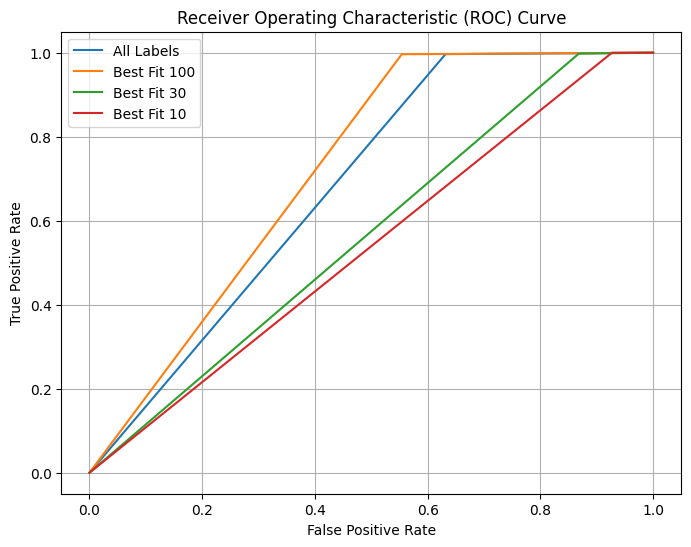

In [77]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
fpr_all, tpr_all, _ = roc_curve(Y_test, Y_pred)
fpr_100, tpr_100, _ = roc_curve(Y_test, Y_pred_100)
fpr_30, tpr_30, _ = roc_curve(Y_test, Y_pred_30)
fpr_10, tpr_10, _ = roc_curve(Y_test, Y_pred_10)
roc_display_all = RocCurveDisplay(fpr=fpr_all, tpr=tpr_all)
roc_display_100 = RocCurveDisplay(fpr=fpr_100, tpr=tpr_100)
roc_display_30 = RocCurveDisplay(fpr=fpr_30, tpr=tpr_30)
roc_display_10 = RocCurveDisplay(fpr=fpr_10, tpr=tpr_10)
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, label='All Labels')
plt.plot(fpr_100, tpr_100, label='Best Fit 100')
plt.plot(fpr_30, tpr_30, label='Best Fit 30')
plt.plot(fpr_10, tpr_10, label='Best Fit 10')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

<Axes: >

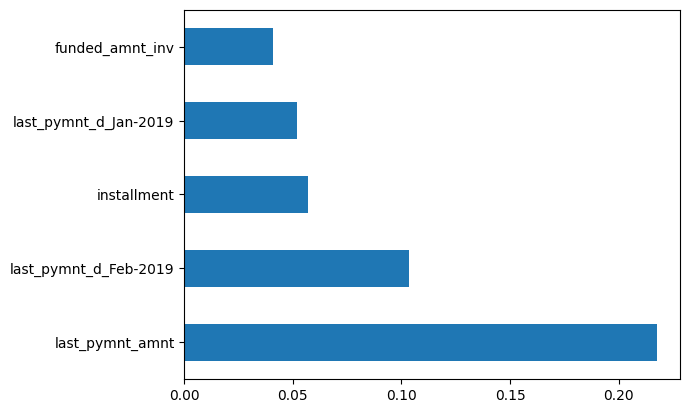

In [87]:
# RFC All
feature_importances_all = pd.Series(rf_classifier.feature_importances_, index=df.columns)
feature_importances_all.nlargest(5).plot(kind='barh')

<Axes: >

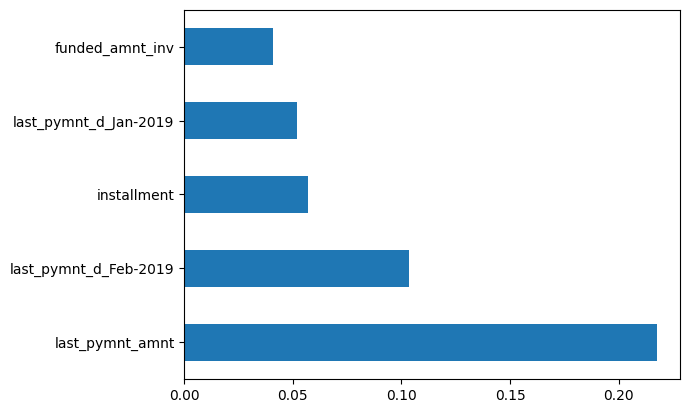

In [88]:
#RFC Top 100
top_indicies_100 = best_selector_100.get_support(indices=True)
features_100 = df.iloc[:,top_indicies_100]
feature_importances_100 = pd.Series(rf_classifier_100.feature_importances_, index=features_100.columns)
feature_importances_100.nlargest(5).plot(kind='barh')

<Axes: >

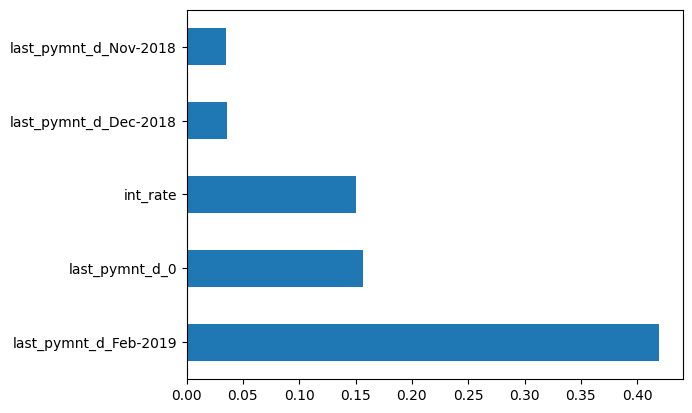

In [89]:
#RFC Top 30
top_indicies_30 = best_selector_30.get_support(indices=True)
features_30 = df.iloc[:,top_indicies_30]
feature_importances_30 = pd.Series(rf_classifier_30.feature_importances_, index=features_30.columns)
feature_importances_30.nlargest(5).plot(kind='barh')

<Axes: >

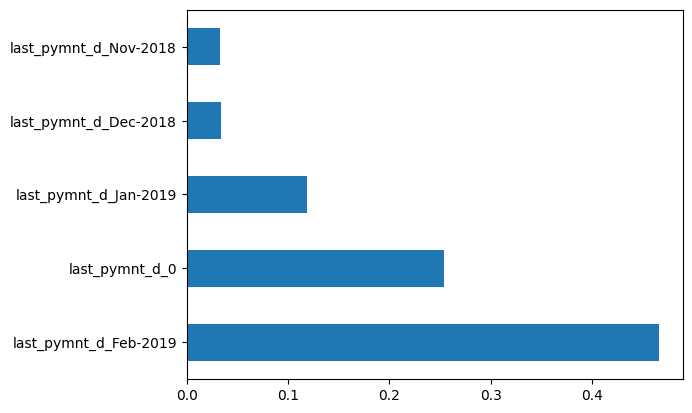

In [90]:
#RFC Top 10
top_indicies_10 = best_selector_10.get_support(indices=True)
features_10 = df.iloc[:,top_indicies_10]
feature_importances_10 = pd.Series(rf_classifier_10.feature_importances_, index=features_10.columns)
feature_importances_10.nlargest(5).plot(kind='barh')

# <font color='blue'> Problem 2:  Boosting (26 pts) </font>
In this problem, you are asked to implement AdaBoost with decision stumps (basically, depth-1 decision trees) and apply it to classify data in 'spamdata.mat'. Select the number of boosting rounds $T^{*}$ from $\mathcal{T}=\{100,200, \ldots, 1000\}$; how did you choose this parameter? Plot the errors on the training and test sets as functions of the number of rounds of boosting $t \in\left[1, T^{*}\right]$.
[Note: If you want to write the code from scratch yourself, you do not have to follow the suggested code structure given below.]

**Part 1: Decision Stump (10 pts)** 
Adaboost is one of the oldest boosting algorithm, capable of converting an ensemble of weak classifiers into a strong classifier. We will use [Decision Stumps](https://en.wikipedia.org/wiki/Decision_stump) as our base (weak) classifiers.

**Part 2: Adaboost (10 pts)** 
This is the same algorithm as we learned in class. You create a new weak learner based on the current sample weights, compute the error of the created weak learner, compute the new learner's weight using the formula $w_{t}=\frac{1}{2} \log \left(\frac{1}{\epsilon_{t}}-1\right)$, and finally update the sample weights. In the next iteration, identify a new weak learner based on the updated sample weights.

**Part 3: Boosting (6 pts)**
Use your Decision Stumps and Adaboost algorithms to run boosting.

### Your answer:

#### Part 1: Decision Stump (10 pts)

In [ ]:
import numpy as np
from operator import lt,ge

class DecisionStump:
    """
    A simple decision stump classifier
    dim : dimension on which to split
    value : value of the dimension
    op : comparator function (either <, <, >= or <=)
    """
    def __init__(self, dim=0, value=0, op=lt):
        self.dim = dim
        self.value = value
        self.op = op
        
    def update(self, dim=None, value=None, op=None):
        if dim is not None: self.dim = dim
        if value is not None: self.value = value
        if op is not None: self.op = op
    
    def predict(self,X):
        return np.array([1 if self.op(x, self.value) else -1 for x in X[:,self.dim]])         
                
    """
    Fit a one-dimensional Decision Stump classifier.
    You should identify the dimension which results in the best split and find the corresponding optimal 
    feature threshold value.
    To facilitate the search for the optimal splitting dimension, this function is called by the fit_data 
    function for every dimension.
    """
    def fit_dim(self,X,Y,sample_weights,num_splits):
        """
        Input:
        X and Y are the input data and labels, respectively. 
        sample_weights are the iterated weights (initialized as (1/m,1/m,1/m,...,1/m))
        num_splits is the number of possible threshold values used for splitting the
        data (we discretize possible threshold values, find the optimal one); this value 
        should be less than the number of samples for the sake of computational efficiency.
        
        Return:
        min_err: the minimum classification error
        split_value: the optimal threshold 
        op: optimal operator (i.e., either >, <, >=, or <=)
        """
        return min_err,split_value,op
    
    """
    Finding an optimal splitting dimension and the corresponding feature threshold value
    X : n x d data matrix, n number of samples with d dimension
    Y : n dimensional array containing label of each observation, label = {-1,1}
    sample_weights : weight of each observation
    num_splits : number of split value to be tested randomly
    
    """
    def fit_data(self,X,Y,sample_weights,num_splits=100):
        """
        Input:
        X and Y are the input data and labels, respectively.
        sample_weights are the iterated weights (initialized as (1/m,1/m,1/m,...,1/m))
        num_splits is the number of possible threshold values used for splitting the
        data (we discretize possible threshold values, find the optimal one); this value 
        should be less than the number of samples for the sake of computational efficiency.
        There is no return in this funtion
        you can use update() to assign the optimal value of self.dim, self.value and self.op
        """

#### Part 2: Adaboost (10 pts)

In [ ]:
class Adaboost:
    def __init__(self, n, weak_learners=None, learner_weights=None):
        self.weak_learners = weak_learners if weak_learners is not None else []
        self.learner_weights = learner_weights if learner_weights is not None else []
        self.sample_weights = np.repeat(1/n,n)
                  
    
    def add_learner(self, X, Y, weak_learner_class = DecisionStump):
        """
        In this function, Adaboost completes one iteration
        Please use the class DecisionStump and its member functions you definted above.
        
        X : n x d data matrix, n is the number of samples in d dimensions
        Y : n dimensional array containing label of each observation, label in {-1,1}
        weak_learner_class is default: DecisionStump
        Notice: you need to use a list to append all the weak learner objects and their weights here
        """
        
    def predict(self,X):
         """
        You can use this function to return predicted label using the iterated strong model.
        The current iterated strong model H(t) consists of t weak learners we saved before 
    
        """
        return predictions
    
    def prediction_error(self,X,Y):
        """
        You can use this function to return the predicted error using the iterated strong model
        """
        return error



#### Part 3: Boosting (6 pts)


In [1]:
import random
import matplotlib.pyplot as plt
import scipy.io


def plot_results(train_error, test_error):
    """
    Plot error on the training and test set as a function 
    of the number of rounds of boosting.
    """

In [ ]:
from sklearn.model_selection import train_test_split
#Read in the dataset
dataFile = 'spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
X = data[:,0:57]
y = data[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50)

# normalize data
X_train = np.log(X_train + 0.1 * np.ones((len(X_train), len(X_train[0]))))
X_test = np.log(X_test + 0.1 * np.ones((len(X_test), len(X_test[0]))))
y_train = 2 * y_train - 1
y_test = 2 * y_test - 1

#Maximum number of weak learners to be used in Adaboost
max_num_weak_learners = 1000

#Train and test error
train_error = []
test_error = []

#Training Adaboost with weak learners
n,d = X_train.shape
model = Adaboost(n)
for m in range(1, max_num_weak_learners + 1):
    print("Training Adaboost with weak learners %d" % m)
    model.add_learner(X_train, y_train)
    train_error.append(model.prediction_error(X_train, y_train))
    test_error.append(model.prediction_error(X_test, y_test))

print("Initial Training Error=%.4f Testing Error= %.4f " % (train_error[0], test_error[0]))
print("Final Training Error=%.4f Testing Error= %.4f " % (train_error[-1], test_error[-1]))
plot_results(train_error, test_error)

# <font color='blue'> Problem 3: Comparing different classification ensembles method (22 pts) </font>

In this problem, we will compare performance of different ensemble methods for classification: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [GradientBoosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers.

[Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase) of UCI will be used ('spamdata.mat', exactly the same dataset we used in Problem 2).

* Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42. 



**Part 1: (5 pts)** Use a Decision Tree Classifier with random_state = 10 and Logistic Regression with random_state = 10 and solver ="lbfgs" for the spam classification problem. Report the accuracy_score and roc_auc_score on the test data for each classifier.


**Part 2: (5 pts)** Create an ensemble of 50 classifiers (i.e., n_estimators = 50) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifiers being Decision Tree Classifier and Logistic Regression from part $1$ . Report accuracy_score and roc_auc_score on the test data for both Bagging classifiers. Compare the results and briefly explain the effect of using bagging for the spam classification problem for both the Logistic Regression and Decision Tree base classifiers.

**Part 3: (5 pts)** Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify whether an email is spam. Report your testing accuracy ([accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score). You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. 


**Part 4: (5 pts)** Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem.  Report  accuracy_score and roc_auc_score on the test data for each algorithm. 

  Note : For part 3 and 4 find the best values for the hyper parameters of each of the models by using GridSearchCV. 


**Part 5: (2 pts)** Briefly explain which of the three ensemble method above from Part 3 & 4 performed the best and why?

### Your answer:

#### Loading and pre-processing dataset

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)

dataFile = 'spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
x_total = data[:,0:57]
y_total = data[:,57]
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.33, random_state=42)

#### Part 1 (**5 pts**)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10).fit(x_train, y_train)
dtc_y_pred = dtc.predict(x_test)
print("Decision Tree Classifier")
print("DTC Accuracy Score:", accuracy_score(y_test, dtc_y_pred))
print("DTC ROC AUC Score:", roc_auc_score(y_test, dtc_y_pred))

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=10, solver="lbfgs", max_iter=300000)
lrc.fit(x_train, y_train)
lr_y_pred = lrc.predict(x_test)
print("\nLogistic Regression")
print("Accuracy Score:", accuracy_score(y_test, lr_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, lr_y_pred))

Decision Tree Classifier
DTC Accuracy Score: 0.9038841342988808
DTC ROC AUC Score: 0.903872196513792

Logistic Regression
Accuracy Score: 0.9249506254114549
ROC AUC Score: 0.9196394302142853


#### Part 2 (**5 pts**)

In [125]:
from sklearn.ensemble import BaggingClassifier
bag_dtc = BaggingClassifier(estimator=dtc, n_estimators=50, random_state=10)
bag_dtc.fit(x_train, y_train)
bag_dtc_y_pred = bag_dtc.predict(x_test)
print("Decision Tree Classifier with Bagging")
print("Accuracy Score:", accuracy_score(y_test, bag_dtc_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, bag_dtc_y_pred))

bag_lrc = BaggingClassifier(estimator=lrc, n_estimators=50, random_state=10)
bag_lrc.fit(x_train, y_train)
bag_lrc_y_pred = bag_lrc.predict(x_test)
print("\nLogistic Regression Classifier with Bagging")
print("Accuracy Score:", accuracy_score(y_test, bag_lrc_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, bag_lrc_y_pred))

Decision Tree Classifier with Bagging
Accuracy Score: 0.9414088215931534
ROC AUC Score: 0.9366857488394997

Logistic Regression Classifier with Bagging
Accuracy Score: 0.9282422646477946
ROC AUC Score: 0.9237853671960431


## Observations
Bagging improved the performance of the Decision Tree classifier but it did not have a significant effect on the Logistic Regression classifier.  This is probably because Logistic Regression already has a lower variance compared to Decision Tree.  

#### Part 3 (**5 pts**)

In [153]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier(random_state=10)
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_rfc = RandomForestClassifier(random_state=42, **best_params_rf)
best_rfc.fit(x_train, y_train)
y_pred_rf = best_rfc.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rfc.predict_proba(x_test)[:, 1])

print("Random Forest Classifier:")
print("Best Hyperparameters:", best_params_rf)
print("Accuracy Score:", accuracy_rf)
print("ROC AUC Score:", roc_auc_rf)

Random Forest Classifier:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy Score: 0.9499670836076366
ROC AUC Score: 0.9876834893943673


#### Part 4 (**5 pts**)

In [152]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

param_gbdt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

gbdt_clf = GradientBoostingClassifier(random_state=10)
grid_search_gbdt = GridSearchCV(estimator=gbdt_clf, param_grid=param_gbdt, cv=5, scoring='accuracy')
grid_search_gbdt.fit(x_train, y_train)
best_params_gbdt = grid_search_gbdt.best_params_
best_gbdt_clf = GradientBoostingClassifier(random_state=42, **best_params_gbdt)
best_gbdt_clf.fit(x_train, y_train)
gbdt_pred = best_gbdt_clf.predict(x_test)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)
gbdt_roc_auc = roc_auc_score(y_test, best_gbdt_clf.predict_proba(x_test)[:, 1])
print("Gradient Boosting Decision Tree (GBDT) Classifier:")
print("Best Hyperparameters:", best_params_gbdt)
print("Testing Accuracy:", gbdt_accuracy)
print("ROC AUC Score:", gbdt_roc_auc)

Gradient Boosting Decision Tree (GBDT) Classifier:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Testing Accuracy: 0.9532587228439763
ROC AUC Score: 0.9879966977340373


In [151]:
from sklearn.ensemble import AdaBoostClassifier

param_boost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

adaboost_clf = AdaBoostClassifier(random_state=10, algorithm='SAMME')
grid_search_adaboost = GridSearchCV(estimator=adaboost_clf, param_grid=param_boost, cv=5, scoring='roc_auc')
grid_search_adaboost.fit(x_train, y_train)
best_params_adaboost = grid_search_adaboost.best_params_
best_adaboost_clf = AdaBoostClassifier(random_state=42, algorithm='SAMME', **best_params_adaboost)
best_adaboost_clf.fit(x_train, y_train)
adaboost_pred = best_adaboost_clf.predict(x_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_roc_auc = roc_auc_score(y_test, best_adaboost_clf.predict_proba(x_test)[:, 1])
print("\nAdaBoost Classifier:")
print("Best Hyperparameters:", best_params_adaboost)
print("Testing Accuracy:", adaboost_accuracy)
print("ROC AUC Score:", adaboost_roc_auc)


AdaBoost Classifier:
Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
Testing Accuracy: 0.9361421988150099
ROC AUC Score: 0.9793155764119721


#### Part 5 (**2 pts**)

## Observations
GradientBoostingClassifier offered the best complete accuracy and ROC AUC score. It also took the most computational resources to run

# <font color='blue'> Problem 4: Support Vector Machines (15 pts) </font>
Let us revisit the task of classifying e-mails as spam vs. not spam. To solve this problem, we will use the SVM with a polynomial kernel. You are allowed to use any existing [libraries](https://scikit-learn.org/stable/modules/svm.html). You can find the dataset file 'spamdata.mat' in Canvas, just below this assignment. Use the first 3000 examples for training, the last 1600 for testing. Start by randomly splitting the training data into ten equal-sized disjoint sets. For each value of the polynomial degree d = {1, 2, 3, 4}, plot the average cross-validation error as a function of the cost (regularization) parameter C. Vary C from a small value C = $2^{-k}$ to C = $2^{k}$, choosing k so that you see a significant variation in training error (from a very high training error to a low training error). Let ($C^{*}, d^{*}$) be the best pair of parameters you identified; from that point on, fix $C = C^{*}$. Plot the ten-fold cross-validation error and the test errors for the hypotheses obtained as a function of d.

**Part 1: (3 pts)** Load data 'spamdata.mat' with [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) and print out the shape of X and y.

**Part 2: cross validation (8 pts)**
Train the SVM with different kernel degrees and regularization constants. Save the results corresponding to different parameters.

**Part 3: plotting results (4 pts)**
Plot the results corresponding to different parameters and choose the best hyperparameters.

In [4]:
import scipy.io
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

### Your answer:

#### Part 1 (**3 pts**)

In [9]:
import scipy.io
dataFile = 'spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
x_total = data[:,0:57]
y_total = data[:,57]
print("X:", x_total.shape)
print("Y:", y_total.shape)

x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.3478, random_state=42)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X: (4601, 57)
Y: (4601,)
x_train: (3000, 57)
x_test: (1601, 57)
y_train: (3000,)
y_test: (1601,)


#### Part 2 (**8 pts**)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_errors = []
test_errors = []

C_values = [0.03125, 0.125, 1, 8, 32]
degrees = [1, 2, 3, 4]

for degree in degrees:
    cv_errors_degree = []
    for C in C_values:
        svm = SVC(kernel='poly', degree=degree, C=C)
        cv_errors_C = []

        for train_index, val_index in kf.split(x_train):
            x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
            svm.fit(x_train_fold, y_train_fold)
            y_val_pred = svm.predict(x_val_fold)
            mse = mean_squared_error(y_val_fold, y_val_pred)
            cv_errors_C.append(mse)
        avg_cv_error_C = np.mean(cv_errors_C)
        print("Degree:", degree, "C:", C, "Mean Error:", avg_cv_error_C)
        cv_errors_degree.append(avg_cv_error_C)
    cv_errors.append(cv_errors_degree)

Degree: 1 C: 0.03125 Mean Error: 0.3413333333333333
Degree: 1 C: 0.125 Mean Error: 0.3313333333333333
Degree: 1 C: 1 Mean Error: 0.308
Degree: 1 C: 8 Mean Error: 0.27399999999999997
Degree: 1 C: 32 Mean Error: 0.2583333333333333
Degree: 2 C: 0.03125 Mean Error: 0.35833333333333334
Degree: 2 C: 0.125 Mean Error: 0.3453333333333333
Degree: 2 C: 1 Mean Error: 0.3383333333333333
Degree: 2 C: 8 Mean Error: 0.33299999999999996
Degree: 2 C: 32 Mean Error: 0.31933333333333336
Degree: 3 C: 0.03125 Mean Error: 0.36033333333333334
Degree: 3 C: 0.125 Mean Error: 0.35633333333333334
Degree: 3 C: 1 Mean Error: 0.3513333333333334
Degree: 3 C: 8 Mean Error: 0.344
Degree: 3 C: 32 Mean Error: 0.3340000000000001
Degree: 4 C: 0.03125 Mean Error: 0.363
Degree: 4 C: 0.125 Mean Error: 0.36166666666666664
Degree: 4 C: 1 Mean Error: 0.35266666666666663
Degree: 4 C: 8 Mean Error: 0.3413333333333333
Degree: 4 C: 32 Mean Error: 0.32933333333333337


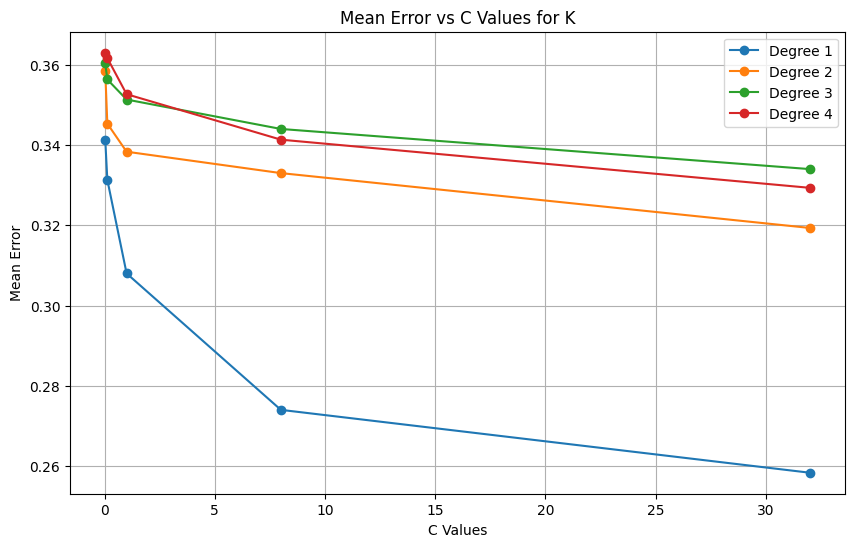

In [42]:
plt.figure(figsize=(10,6))
plt.plot(C_values, cv_errors[0], marker='o', label="Degree 1")
plt.plot(C_values, cv_errors[1], marker='o', label="Degree 2")
plt.plot(C_values, cv_errors[2], marker='o', label="Degree 3")
plt.plot(C_values, cv_errors[3], marker='o', label="Degree 4")
plt.legend()
plt.xlabel('C Values')
plt.ylabel('Mean Error')
plt.title('Mean Error vs C Values for K')
plt.grid()
plt.show()

In [45]:
min_error = np.inf
for i, degree_errors in enumerate(cv_errors):
    for j, error in enumerate(degree_errors):
        if error < min_error:
            min_error = error
            best_degree = degrees[i]
            best_C_index = j

best_C = C_values[best_C_index]

print("Best degree:", best_degree)
print("Best C:", best_C)

test_errors = []
best_cv_errors = []
i = 0
for degree in degrees:
    svm = SVC(kernel='poly', degree=degree, C=best_C)
    svm.fit(x_train, y_train)
    y_test_pred = svm.predict(x_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)
    best_cv_errors.append(cv_errors[i][best_C_index])
    i = i + 1

Best degree: 1
Best C: 32


#### Part 3 (**4 pts**)

[1, 2, 3, 4]
[0.2517176764522174, 0.3123048094940662, 0.3279200499687695, 0.32729544034978136]


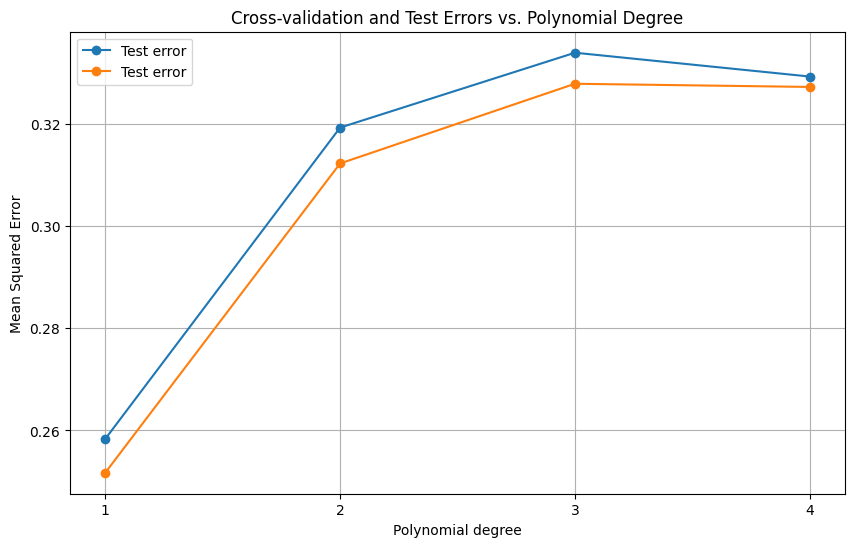

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, best_cv_errors, marker='o', label='Cross-validation error')
plt.plot(degrees, test_errors, marker='o', label='Test error')
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title('Cross-validation and Test Errors vs. Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()